# LLM Tutorial: Langchain Agent

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch10-2024Fall_huggingfaceimage.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch10-2024Fall_huggingfaceimage.ipynb)       
**Author:** Kaikai Liu

## Install Pytorch

Pytorch is already installed in Colab. If you are installing the pytorch in your local machine, follow the tutorials here: from https://pytorch.org/get-started/locally/. You can check our pytorch installation tutorials for Mac/Windows/Linux/HPC here: https://deepdatamininglearning.readthedocs.io/

Click "Connect" to connect to a Colab VM instance. In Runtime->Change Runtime type to select CPU/TPU/GPU.

In [ ]:
!nvidia-smi

Mon Sep  2 17:00:17 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-12GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   32C    P0             26W /  250W |       5MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip3 install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19

If the installed version of PyTorch is lower than required, uninstall it and reinstall again by running the following commands:

!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

---

🚨 _Note: the above `pip install` is formatted for Jupyter notebooks. If running elsewhere you may need to drop the `!`._

---

## Check PyTorch Environment

Pytorch is very similar to the `numpy` package. Let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

Start a local colab container: `docker run --gpus=all -p 127.0.0.1:9000:8080 us-docker.pkg.dev/colab-images/public/runtime`, copy the link output from the terminal. In Colab, select connect to local runtime and paste the link: http://127.0.0.1:9000/?token=cf72df5a62ed764fd3bce315a542cade27d7984365045cc2

In [ ]:
!python -V

Python 3.10.12


In [ ]:
!nvidia-smi #check GPU

Sat Aug 31 20:18:15 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-12GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   32C    P0             26W /  250W |       5MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.3.0+cu121


In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4722, 0.1678, 0.9813],
        [0.6751, 0.5239, 0.5018],
        [0.0766, 0.7491, 0.2419],
        [0.8492, 0.8048, 0.9454],
        [0.8544, 0.7565, 0.1705]])


In [ ]:
import torchvision
print(torchvision.__version__)

0.18.0+cu121


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')  # CUDA GPU
elif torch.backends.mps.is_available():
    device = torch.device('mps') #Apple GPU
else:
    device = torch.device("cpu")

In [ ]:
print('Using device:', device)
#Additional Info when using cuda
if device.type == 'cuda':
    print("Device name: ", torch.cuda.get_device_name(0))
    print("Device properties:", torch.cuda.get_device_properties(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
Device name:  Tesla P100-PCIE-12GB
Device properties: _CudaDeviceProperties(name='Tesla P100-PCIE-12GB', major=6, minor=0, total_memory=12186MB, multi_processor_count=56)
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.version.cuda

'12.1'

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
torch.backends.cudnn.version()

8906

In [ ]:
!echo $LD_LIBRARY_PATH

/usr/local/nvidia/lib:/usr/local/nvidia/lib64


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [ ]:
torch.manual_seed(42) # Setting the seed

## Agent and Langgraph

By themselves, language models can't take actions - they just output text. A big use case for LangChain is creating agents. Agents are systems that use LLMs as reasoning engines to determine which actions to take and the inputs to pass them. After executing actions, the results can be fed back into the LLM to determine whether more actions are needed, or whether it is okay to finish.



https://github.com/langchain-ai/langgraph

LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows. Compared to other LLM frameworks, it offers these core benefits: cycles, controllability, and persistence. LangGraph allows you to define flows that involve cycles, essential for most agentic architectures, differentiating it from DAG-based solutions. As a very low-level framework, it provides fine-grained control over both the flow and state of your application, crucial for creating reliable agents. Additionally, LangGraph includes built-in persistence, enabling advanced human-in-the-loop and memory features.

In [ ]:
! pip install langchain langchain_community langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -U langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install -qU langchain-nvidia-ai-endpoints

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.4.0 which is incompatible.


One of the central concepts of LangGraph is state. Each graph execution creates a state that is passed between nodes in the graph as they execute, and each node updates this internal state with its return value after it executes. The way that the graph updates its internal state is defined by either the type of graph chosen or a custom function.

We'll first create a simple chatbot using LangGraph. This chatbot will respond directly to user messages. Start by creating a StateGraph. A StateGraph object defines the structure of our chatbot as a "state machine". We'll add nodes to represent the llm and functions our chatbot can call and edges to specify how the bot should transition between these functions.

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

#The State consists of the schema of the graph as well as reducer functions which specify how to apply updates to the state.
#our example State is a TypedDict with a single key: messages.
#The messages key is annotated with the add_messages reducer function, which tells LangGraph to append new messages to the existing list,
#rather than overwriting it. State keys without an annotation will be overwritten by each update, storing the most recent value.
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

https://langchain-ai.github.io/langgraph/reference/graphs/?h=add+messages#add_messages

Every node we define will receive the current State as input and return a value that updates that state.

Messages will be appended to the current list, rather than directly overwritten. This is communicated via the prebuilt add_messages function in the Annotated syntax.

Next, add a "chatbot" node. Nodes represent units of work. They are typically regular python functions.

In [ ]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvidia_api_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvidia_api_key.startswith("nvapi-"), f"{nvidia_api_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvidia_api_key

Enter your NVIDIA API key: ··········


In [ ]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()


llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [ ]:
#the chatbot node function takes the current State as input and returns a dictionary containing an updated messages list under the key "messages".
#This is the basic pattern for all LangGraph node functions.
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

The add_messages function in our State will append the llm's response messages to whatever messages are already in the state.

Next, add an entry point. This tells our graph where to start its work each time we run it.

In [ ]:
graph_builder.add_edge(START, "chatbot")

Similarly, set a finish point. This instructs the graph "any time this node is run, you can exit."

In [ ]:
graph_builder.add_edge("chatbot", END)

Finally, we'll want to be able to run our graph. To do so, call "compile()" on the graph builder. This creates a "CompiledGraph" we can use invoke on our state.

In [ ]:
graph = graph_builder.compile()

You can visualize the graph using the get_graph method and one of the "draw" methods, like draw_ascii or draw_png. The draw methods each require additional dependencies.

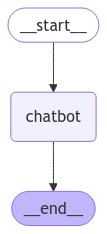

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

You can exit the chat loop at any time by typing "quit", "exit", or "q".

In [ ]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

User: Hello
Assistant: Hello! How can I assist you today?
User: What's the wildfire in California?
Assistant: You're likely referring to the ongoing wildfires in California. Unfortunately, California has been experiencing a series of devastating wildfires in recent years, and it's difficult to pinpoint a single wildfire without more specific information. However, I can provide you with some general information about the current wildfire situation in California.

**Current Wildfires:**

As of my knowledge cutoff, there are several active wildfires burning across California. Some of the most notable ones include:

1. **The Dixie Fire:** This is one of the largest wildfires in California's history, burning over 963,000 acres in Plumas, Butte, Lassen, and Shasta counties.
2. **The Caldor Fire:** This fire has burned over 219,000 acres in El Dorado and Amador counties, forcing evacuations and closures in the Sierra Nevada foothills.
3. **The Monument Fire:** This fire has burned over 55,000

This bot can engage in basic conversation by taking user input and generating responses using an LLM. However, you may have noticed that the bot's knowledge is limited to what's in its training data.

### Add Web Search

To handle queries our chatbot can't answer "from memory", we'll integrate a web search tool. Our bot can use this tool to find relevant information and provide better responses.

https://python.langchain.com/v0.2/docs/integrations/tools/tavily_search/
Tavily's Search API is a search engine built specifically for AI agents (LLMs), delivering real-time, accurate, and factual results at speed.

https://tavily.com/, https://app.tavily.com/home (signin via google account)

In [ ]:
%pip install -qU "langchain-community>=0.2.11" tavily-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00


In [ ]:
import getpass
import os

if not os.environ.get("TAVILY_API_KEY"):
    os.environ["TAVILY_API_KEY"] = getpass.getpass("Tavily API key:\n")

Tavily API key:
··········


instantiate an instance of the Tavily search tools

In [ ]:
from langchain_community.tools import TavilySearchResults

tool = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
    include_raw_content=True,
    include_images=True,
    # include_domains=[...],
    # exclude_domains=[...],
    # name="...",            # overwrite default tool name
    # description="...",     # overwrite default tool description
    # args_schema=...,       # overwrite default args_schema: BaseModel
)

The TavilySearchResults tool takes a single "query" argument, which should be a natural language query:

In [ ]:
tool.invoke({"query": "What happened at San Jose"})

[{'url': 'https://www.cnn.com/us/live-news/san-jose-ca-shooting-05-27-21/index.html',
  'content': 'At least nine people were killed after a gunman opened fire Wednesday morning at a public transit yard in San Jose, California. Police officials say the gunman, who is believed to have taken his ...'},
 {'url': 'https://en.wikipedia.org/wiki/2021_San_Jose_shooting',
  'content': 'On May 26, 2021, a mass shooting occurred at a Santa Clara Valley Transportation Authority (VTA) rail yard in San Jose, California, United States.A 57-year-old VTA employee, Samuel James Cassidy, shot and killed nine VTA employees before committing suicide. [1] [4] It is the deadliest mass shooting in the history of the San Francisco Bay Area.[5]As a result of the shooting, service throughout ...'},
 {'url': 'https://www.cbsnews.com/live-updates/san-jose-shooting-9-dead/',
  'content': '9 people killed, suspect dead in San Jose shooting. Updated on: May 27, 2021 / 6:42 AM EDT / CBS News. An employee opened fire 

In [ ]:
result = tool.invoke("What's a 'node' in LangGraph?")

In [ ]:
result

[{'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'Nodes¶ In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id). Similar to NetworkX, you add these nodes to a graph using the add_node method:'},
 {'url': 'https://medium.com/@kbdhunga/langgraph-multi-agent-collaboration-explained-c0500b0f2e61',
  'content': 'Nodes: Nodes in LangGraph represent individual units of computation or functionality within a graph. Nodes can be functions or runnables that perform specific tasks or operations.'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs 

In [ ]:
len(result)

5

In [ ]:
result[0]

{'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
 'content': 'Nodes¶ In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id). Similar to NetworkX, you add these nodes to a graph using the add_node method:'}

We can use our tool in a chain by first binding it to a tool-calling model and then calling it:

In [ ]:
import datetime

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableConfig, chain

today = datetime.datetime.today().strftime("%D")
prompt = ChatPromptTemplate(
    [
        ("system", f"You are a helpful assistant. The date today is {today}."),
        ("human", "{user_input}"),
        ("placeholder", "{messages}"),
    ]
)

# specifying tool_choice will force the model to call this tool.
llm_with_tools = llm.bind_tools([tool])

llm_chain = prompt | llm_with_tools


@chain
def tool_chain(user_input: str, config: RunnableConfig):
    input_ = {"user_input": user_input}
    ai_msg = llm_chain.invoke(input_, config=config)
    tool_msgs = tool.batch(ai_msg.tool_calls, config=config)
    return llm_chain.invoke({**input_, "messages": [ai_msg, *tool_msgs]}, config=config)


In [ ]:
tool_chain.invoke("What happened at San Jose")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'chatcmpl-tool-0d2d02d89530451a99753b3a24dd6080', 'type': 'function', 'function': {'name': 'tavily_search_results_json', 'arguments': '{"query": "San Jose news"}'}}]}, response_metadata={'role': 'assistant', 'content': None, 'tool_calls': [{'id': 'chatcmpl-tool-0d2d02d89530451a99753b3a24dd6080', 'type': 'function', 'function': {'name': 'tavily_search_results_json', 'arguments': '{"query": "San Jose news"}'}}], 'token_usage': {'prompt_tokens': 375, 'total_tokens': 393, 'completion_tokens': 18}, 'finish_reason': 'tool_calls', 'model_name': 'meta/llama-3.1-8b-instruct'}, id='run-e853bd12-46e9-4a7d-81c8-ff503f21ba2a-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'San Jose news'}, 'id': 'chatcmpl-tool-0d2d02d89530451a99753b3a24dd6080', 'type': 'tool_call'}], role='assistant')

### Langgraph with Web Search

In [ ]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()


llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [ ]:
from langchain_community.tools import TavilySearchResults

tool = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
    include_raw_content=True,
    include_images=True,
    # include_domains=[...],
    # exclude_domains=[...],
    # name="...",            # overwrite default tool name
    # description="...",     # overwrite default tool description
    # args_schema=...,       # overwrite default args_schema: BaseModel
)

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

tools = [tool]
# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

Next we need to create a function to actually run the tools if they are called. We'll do this by adding the tools to a new node.

Below, implement a BasicToolNode that checks the most recent message in the state and calls tools if the message contains tool_calls. It relies on the LLM's tool_calling support, which is available in Anthropic, OpenAI, Google Gemini, and a number of other LLM providers.

In [ ]:
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

call define a router function called route_tools, that checks for tool_calls in the chatbot's output. Provide this function to the graph by calling add_conditional_edges, which tells the graph that whenever the chatbot node completes to check this function to see where to go next.

The condition will route to tools if tool calls are present and "__end__" if not.

In [ ]:
from typing import Literal


def route_tools(
    state: State,
) -> Literal["tools", "__end__"]:
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return "__end__"


# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "__end__" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", "__end__": "__end__"},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

conditional edges start from a single node. This tells the graph "any time the 'chatbot' node runs, either go to 'tools' if it calls a tool, or end the loop if it responds directly.

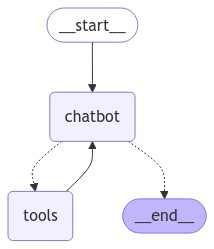

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

Now we can ask the bot questions outside its training data.

In [ ]:
from langchain_core.messages import BaseMessage

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            if isinstance(value["messages"][-1], BaseMessage):
                print("Assistant:", value["messages"][-1].content)

User: Tell me more about langgraph
Assistant: 
Assistant: [{"url": "https://github.com/langchain-ai/langgraph", "content": "LangGraph is a framework for creating stateful, multi-actor applications with LLMs, using cycles, controllability, and persistence. It integrates with LangChain and LangSmith, and supports human-in-the-loop and streaming features."}, {"url": "https://www.langchain.com/langgraph", "content": "LangGraph is a framework for building stateful, multi-actor agents with LLMs that can handle complex scenarios and collaborate with humans. Learn how to use LangGraph with Python or JavaScript, and deploy your agents at scale with LangGraph Cloud."}, {"url": "https://www.datacamp.com/tutorial/langgraph-tutorial", "content": "LangGraph is a library within the LangChain ecosystem that simplifies the development of complex, multi-agent large language model (LLM) applications. Learn how to use LangGraph to create stateful, flexible, and scalable systems with nodes, edges, and stat

### Adding Memory to the Chatbot

LangGraph solves this problem through persistent checkpointing. If you provide a checkpointer when compiling the graph and a thread_id when calling your graph, LangGraph automatically saves the state after each step. When you invoke the graph again using the same thread_id, the graph loads its saved state, allowing the chatbot to pick up where it left off.

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

#create a MemorySaver checkpointer
memory = MemorySaver()

we're using an in-memory checkpointer. This is convenient for our tutorial (it saves it all in-memory). In a production application, you would likely change this to use SqliteSaver or PostgresSaver and connect to your own DB.

Next define the graph. Now that you've already built your own BasicToolNode, we'll replace it with LangGraph's prebuilt ToolNode and tools_condition, since these do some nice things like parallel API execution.

In [ ]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()


llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [ ]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

Finally, compile the graph with the provided checkpointer.

In [ ]:
graph = graph_builder.compile(checkpointer=memory)

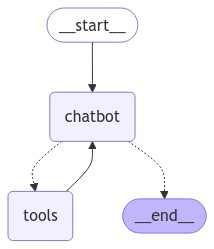

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

Now you can interact with your bot! First, pick a thread to use as the key for this conversation.

In [ ]:
config = {"configurable": {"thread_id": "1"}}

In [ ]:
user_input = "Hi there! My name is SJSU."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is SJSU.
================================== Ai Message ==================================

Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?


In [ ]:
len(event['messages'])

4

In [ ]:
event['messages'][-2]

HumanMessage(content='Hi there! My name is SJSU.', id='c3ffa6ba-d523-46d3-b5db-932864965583')

In [ ]:
event['messages'][-1]

AIMessage(content="Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?", response_metadata={'role': 'assistant', 'content': "Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?", 'token_usage': {'prompt_tokens': 354, 'total_tokens': 382, 'completion_tokens': 28}, 'finish_reason': 'stop', 'model_name': 'meta/llama-3.1-8b-instruct'}, id='run-11db8315-bf75-4ad9-b3ad-787de5da2a6a-0', role='assistant')

The config was provided as the second positional argument when calling our graph. It importantly is not nested within the graph inputs ({'messages': []}).

In [ ]:
user_input = "Remember my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

I'll remember your name as SJSU for our conversation.


In [ ]:
# The only difference is we change the `thread_id` here to "2" instead of "1"
events = graph.stream(
    {"messages": [("user", user_input)]},
    {"configurable": {"thread_id": "2"}},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

I'm happy to chat with you, but I don't have any prior knowledge or memory of our previous conversations. Each time you interact with me, it's a new conversation and I don't retain any information from previous chats.


By now, we have made a few checkpoints across two different threads. But what goes into a checkpoint? To inspect a graph's state for a given config at any time, call get_state(config).

In [ ]:
snapshot = graph.get_state(config)
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='Hi there! Good Morning.', id='2c99bc70-434c-43e4-85a8-86bd9ec93f3b'), AIMessage(content="Good morning! It's nice to meet you. Is there anything I can help you with today?", response_metadata={'role': 'assistant', 'content': "Good morning! It's nice to meet you. Is there anything I can help you with today?", 'token_usage': {'prompt_tokens': 314, 'total_tokens': 334, 'completion_tokens': 20}, 'finish_reason': 'stop', 'model_name': 'meta/llama-3.1-8b-instruct'}, id='run-b70e9acf-419c-4348-80c9-b295e208871b-0'), HumanMessage(content='Hi there! My name is SJSU.', id='c3ffa6ba-d523-46d3-b5db-932864965583'), AIMessage(content="Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?", response_metadata={'role': 'assistant', 'content': "Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?", 'token_usage': {'prompt_tokens': 354, 'total_to

The snapshot above contains the current state values, corresponding config, and the next node to process. In our case, the graph has reached an __end__ state, so next is empty.

chatbot can now maintain conversation state across sessions thanks to LangGraph's checkpointing system. LangGraph's checkpointing even handles arbitrarily complex graph states, which is much more expressive and powerful than simple chat memory.

### Human-in-the-loop

Agents can be unreliable and may need human input to successfully accomplish tasks. Similarly, for some actions, you may want to require human approval before running to ensure that everything is running as intended. This can be in several ways, but the primary supported way is to add an "interrupt" before a node is executed. This interrupts execution at that node. You can then resume from that spot to continue.



we will use LangGraph's interrupt_before functionality to always break the tool node. You can accomplish similar functionality using either `interrupt_before` or `interrupt_after` in the create_react_agent(model, tools=tool, interrupt_before=["tools" | "agent"], interrupt_after=["tools" | "agent"]) constructor.

https://langchain-ai.github.io/langgraph/reference/prebuilt/#create_react_agent

In [ ]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()


llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

https://langchain-ai.github.io/langgraph/reference/prebuilt/#toolnode

We can now wrap these tools in a simple ToolNode. This is a simple class that takes in a list of messages containing an AIMessages with tool_calls, runs the tools, and returns the output as ToolMessages.

In [ ]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

memory = MemorySaver()


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]

#we should make sure the model knows that it has these tools available to call.
#We can do this by converting the LangChain tools into the format for LLM function calling, and then bind them to the model class.
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

#We can now wrap these tools in a simple ToolNode. This is a simple class that takes in a list of messages containing an AIMessages with tool_calls,
#runs the tools, and returns the output as ToolMessages.
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

Now, compile the graph, specifying to interrupt_before the tools node. To always interrupt before a particular node, pass the name of the node to compile

In [ ]:
graph = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)

In [ ]:
user_input = "I'm learning LangGraph. Could you do some research on it for me?"
config = {"configurable": {"thread_id": "1"}}
# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm learning LangGraph. Could you do some research on it for me?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-e27a0088aba041949bb217750735f223)
 Call ID: chatcmpl-tool-e27a0088aba041949bb217750735f223
  Args:
    query: LangGraph


Let's inspect the graph state to confirm it worked.

In [ ]:
snapshot = graph.get_state(config)
snapshot.next

('tools',)

In [ ]:
existing_message = snapshot.values["messages"][-1]
existing_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'LangGraph'},
  'id': 'chatcmpl-tool-e27a0088aba041949bb217750735f223',
  'type': 'tool_call'}]

In [ ]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = graph.stream(None, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-e27a0088aba041949bb217750735f223)
 Call ID: chatcmpl-tool-e27a0088aba041949bb217750735f223
  Args:
    query: LangGraph
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.langchain.com/langgraph", "content": "LangGraph is a framework for building stateful, multi-actor agents with LLMs that can handle complex scenarios and collaborate with humans. Learn how to use LangGraph with Python or JavaScript, and deploy your agents at scale with LangGraph Cloud."}, {"url": "https://www.datacamp.com/tutorial/langgraph-tutorial", "content": "LangGraph is a library within the LangChain ecosystem that simplifies the development of complex, multi-agent large language model (LLM) applications. Learn how to use LangGraph to create stateful, flexible, and scalable systems with nodes, 

### Customize the bot's behavior using custom state updates.

we showed how to interrupt a graph so that a human could inspect its actions. This lets the human read the state, but if they want to change their agent's course, they'll need to have write access.

LangGraph lets you manually update state! Updating the state lets you control the agent's trajectory by modifying its actions (even modifying the past!). This capability is particularly useful when you want to correct the agent's mistakes, explore alternative paths, or guide the agent towards a specific goal.

In [ ]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]

llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
memory = MemorySaver()
graph = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt **after** actions, if desired.
    # interrupt_after=["tools"]
)

user_input = "I'm learning LangGraph. Could you do some research on it for me?"
config = {"configurable": {"thread_id": "1"}}
# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream({"messages": [("user", user_input)]}, config)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

In [ ]:
snapshot = graph.get_state(config)
existing_message = snapshot.values["messages"][-1]
existing_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-7766e89b71d042eb880822c7542f8ad1)
 Call ID: chatcmpl-tool-7766e89b71d042eb880822c7542f8ad1
  Args:
    query: LangGraph


In [ ]:
from langchain_core.messages import AIMessage, ToolMessage

answer = (
    "LangGraph is a library for building stateful, multi-actor applications with LLMs."
)
new_messages = [
    # The LLM API expects some ToolMessage to match its tool call. We'll satisfy that here.
    ToolMessage(content=answer, tool_call_id=existing_message.tool_calls[0]["id"]),
    # And then directly "put words in the LLM's mouth" by populating its response.
    AIMessage(content=answer),
]

new_messages[-1].pretty_print()
graph.update_state(
    # Which state to update
    config,
    # The updated values to provide. The messages in our `State` are "append-only", meaning this will be appended
    # to the existing state. We will review how to update existing messages in the next section!
    {"messages": new_messages},
)

print("\n\nLast 2 messages;")
print(graph.get_state(config).values["messages"][-2:])

================================== Ai Message ==================================

LangGraph is a library for building stateful, multi-actor applications with LLMs.


Last 2 messages;
[ToolMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='7a6e8c97-dba3-428e-8347-6e57651a11dc', tool_call_id='chatcmpl-tool-7766e89b71d042eb880822c7542f8ad1'), AIMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='29d7b79b-db9b-42c3-9d38-ab2147c171e3')]


In [ ]:
graph.update_state(
    config,
    {"messages": [AIMessage(content="I'm an AI expert!")]},
    # Which node for this function to act as. It will automatically continue
    # processing as if this node just ran.
    as_node="chatbot",
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1ef705c5-c2de-6eee-8003-182508afa521'}}

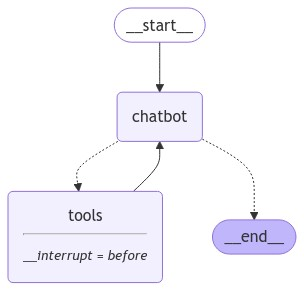

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

Inspect the current state as before to confirm the checkpoint reflects our manual updates.

In [ ]:
snapshot = graph.get_state(config)
print(snapshot.values["messages"][-3:])
print(snapshot.next)

[ToolMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='7a6e8c97-dba3-428e-8347-6e57651a11dc', tool_call_id='chatcmpl-tool-7766e89b71d042eb880822c7542f8ad1'), AIMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='29d7b79b-db9b-42c3-9d38-ab2147c171e3'), AIMessage(content="I'm an AI expert!", id='b2021974-0331-4a90-8d41-b25227e3b00e')]
()


As an example, let's update the tool invocation to make sure we get good results from our search engine! First, start a new thread:

In [ ]:
user_input = "I'm learning LangGraph. Could you do some research on it for me?"
config = {"configurable": {"thread_id": "2"}}  # we'll use thread_id = 2 here
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm learning LangGraph. Could you do some research on it for me?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d)
 Call ID: chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d
  Args:
    query: LangGraph


Next, let's update the tool invocation for our agent. Maybe we want to search for human-in-the-loop workflows in particular.

In [ ]:
from langchain_core.messages import AIMessage

snapshot = graph.get_state(config)
existing_message = snapshot.values["messages"][-1]
print("Original")
print("Message ID", existing_message.id)
print(existing_message.tool_calls[0])
new_tool_call = existing_message.tool_calls[0].copy()
new_tool_call["args"]["query"] = "LangGraph human-in-the-loop workflow"
new_message = AIMessage(
    content=existing_message.content,
    tool_calls=[new_tool_call],
    # Important! The ID is how LangGraph knows to REPLACE the message in the state rather than APPEND this messages
    id=existing_message.id,
)

print("Updated")
print(new_message.tool_calls[0])
print("Message ID", new_message.id)
graph.update_state(config, {"messages": [new_message]})

print("\n\nTool calls")
graph.get_state(config).values["messages"][-1].tool_calls

Original
Message ID run-7cb1d704-1961-4b31-9f5b-196c40e333ef-0
{'name': 'tavily_search_results_json', 'args': {'query': 'LangGraph'}, 'id': 'chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d', 'type': 'tool_call'}
Updated
{'name': 'tavily_search_results_json', 'args': {'query': 'LangGraph human-in-the-loop workflow'}, 'id': 'chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d', 'type': 'tool_call'}
Message ID run-7cb1d704-1961-4b31-9f5b-196c40e333ef-0


Tool calls


[{'name': 'tavily_search_results_json',
  'args': {'query': 'LangGraph human-in-the-loop workflow'},
  'id': 'chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d',
  'type': 'tool_call'}]

Notice that we've modified the AI's tool invocation to search for "LangGraph human-in-the-loop workflow" instead of the simple "LangGraph".

Resume the graph by streaming with an input of None and the existing config.

In [ ]:
events = graph.stream(None, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d)
 Call ID: chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d
  Args:
    query: LangGraph human-in-the-loop workflow
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.geeky-gadgets.com/human-in-the-loop-ai/", "content": "Human in the Loop AI systems with LangChain and LangGraph.js By integrating human intervention at key decision points, such as processing refunds, LangGraph.js addresses the problem of potential AI errors or misuse. HITL involves strategically integrating human intervention and decision-making into AI workflows, allowing for a seamless collaboration between human expertise and machine intelligence. This guide by the team at LangChain explores the significance of HITL and how LangGraph.js, a powerful tool for AI workflow

In [ ]:
events = graph.stream(
    {
        "messages": (
            "user",
            "Remember what I'm learning about?",
        )
    },
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember what I'm learning about?
================================== Ai Message ==================================

You're learning about LangGraph. I did some research on it for you earlier.
